### Movie Lens Project
### ************

### Problem Objective :

Here, we ask you to perform the analysis using the Exploratory Data Analysis technique. You need to find features affecting the ratings of any particular movie and build a model to predict the movie ratings.

Domain: Entertainment

### Analysis Tasks to be performed:

Import the three datasets
Create a new dataset [Master_Data] with the following columns MovieID Title UserID Age Gender Occupation Rating. (Hint: (i) Merge two tables at a time. (ii) Merge the tables using two primary keys MovieID & UserId)
Explore the datasets using visual representations (graphs or tables), also include your comments on the following:
1. User Age Distribution
2. User rating of the movie “Toy Story”
3. Top 25 movies by viewership rating
4. Find the ratings for all the movies reviewed by for a particular user of user id = 2696


### Feature Engineering:
            Use column genres:

1. Find out all the unique genres (Hint: split the data in column genre making a list and then process the data to find out only the unique categories of genres)
2. Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre. 
3. Determine the features affecting the ratings of any particular movie.
4. Develop an appropriate model to predict the movie ratings

In [64]:
# Import required libraries
import os
import pathlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
print(f"Numpy Version: {np.__version__}")
print(f"Pandas Version: {pd.__version__}")

Numpy Version: 1.19.2
Pandas Version: 1.0.3


####### Import the three datasets 

In [3]:
# Import movies, users and ratings datasets

path = os.path.join(pathlib.Path('.').parent.resolve(),'Data science with Python 1')

# Format - MovieID::Title::Genres
movies_data = pd.read_csv(os.path.join(path,'movies.dat'),sep='::', names=['MovieID', 'Title', 'Genres'],encoding='latin-1')

# Format - UserID::MovieID::Rating::Timestamp
ratings_data = pd.read_csv(os.path.join(path,'ratings.dat'),sep='::', names=['UserID', 'MovieID', 'Rating', 'Timestamp'])

# Format -  UserID::Gender::Age::Occupation::Zip-code
users_data = pd.read_csv(os.path.join(path,'users.dat'),sep='::', names=['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'])

<ipython-input-3-9734bf1e03a9>:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movies_data = pd.read_csv(os.path.join(path,'movies.dat'),sep='::', names=['MovieID', 'Title', 'Genres'],encoding='latin-1')
<ipython-input-3-9734bf1e03a9>:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ratings_data = pd.read_csv(os.path.join(path,'ratings.dat'),sep='::', names=['UserID', 'MovieID', 'Rating', 'Timestamp'])
<ipython-input-3-9734bf1e03a9>:12: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interprete

In [4]:
# Describing all datasets

print("Movies Data:")
print(movies_data.describe())
print(movies_data.info)

Movies Data:
           MovieID
count  3883.000000
mean   1986.049446
std    1146.778349
min       1.000000
25%     982.500000
50%    2010.000000
75%    2980.500000
max    3952.000000
<bound method DataFrame.info of       MovieID                               Title  \
0           1                    Toy Story (1995)   
1           2                      Jumanji (1995)   
2           3             Grumpier Old Men (1995)   
3           4            Waiting to Exhale (1995)   
4           5  Father of the Bride Part II (1995)   
...       ...                                 ...   
3878     3948             Meet the Parents (2000)   
3879     3949          Requiem for a Dream (2000)   
3880     3950                    Tigerland (2000)   
3881     3951             Two Family House (2000)   
3882     3952               Contender, The (2000)   

                            Genres  
0      Animation|Children's|Comedy  
1     Adventure|Children's|Fantasy  
2                   Comedy|Romance  

In [5]:
# Describing all datasets

print("Ratings Data:")
print(ratings_data.describe())
print(ratings_data.info)

Ratings Data:
             UserID       MovieID        Rating     Timestamp
count  1.000209e+06  1.000209e+06  1.000209e+06  1.000209e+06
mean   3.024512e+03  1.865540e+03  3.581564e+00  9.722437e+08
std    1.728413e+03  1.096041e+03  1.117102e+00  1.215256e+07
min    1.000000e+00  1.000000e+00  1.000000e+00  9.567039e+08
25%    1.506000e+03  1.030000e+03  3.000000e+00  9.653026e+08
50%    3.070000e+03  1.835000e+03  4.000000e+00  9.730180e+08
75%    4.476000e+03  2.770000e+03  4.000000e+00  9.752209e+08
max    6.040000e+03  3.952000e+03  5.000000e+00  1.046455e+09
<bound method DataFrame.info of          UserID  MovieID  Rating  Timestamp
0             1     1193       5  978300760
1             1      661       3  978302109
2             1      914       3  978301968
3             1     3408       4  978300275
4             1     2355       5  978824291
...         ...      ...     ...        ...
1000204    6040     1091       1  956716541
1000205    6040     1094       5  956704887


In [7]:
# Describing all datasets

print("Users Data:")
print(users_data.describe())
print(users_data.info)

Users Data:
            UserID          Age   Occupation
count  6040.000000  6040.000000  6040.000000
mean   3020.500000    30.639238     8.146854
std    1743.742145    12.895962     6.329511
min       1.000000     1.000000     0.000000
25%    1510.750000    25.000000     3.000000
50%    3020.500000    25.000000     7.000000
75%    4530.250000    35.000000    14.000000
max    6040.000000    56.000000    20.000000
<bound method DataFrame.info of       UserID Gender  Age  Occupation Zip-code
0          1      F    1          10    48067
1          2      M   56          16    70072
2          3      M   25          15    55117
3          4      M   45           7    02460
4          5      M   25          20    55455
...      ...    ...  ...         ...      ...
6035    6036      F   25          15    32603
6036    6037      F   45           1    76006
6037    6038      F   56           1    14706
6038    6039      F   45           0    01060
6039    6040      M   25           6    11106

#######

Create a new dataset [Master_Data] with the following columns MovieID Title UserID Age Gender Occupation Rating. (Hint: (i) Merge two tables at a time. (ii) Merge the tables using two primary keys MovieID & UserId)

In [6]:
print(movies_data.head(1))
print(users_data.head(1))
print(ratings_data.head(1))

   MovieID             Title                       Genres
0        1  Toy Story (1995)  Animation|Children's|Comedy
   UserID Gender  Age  Occupation Zip-code
0       1      F    1          10    48067
   UserID  MovieID  Rating  Timestamp
0       1     1193       5  978300760


In [7]:
movies_ratings = ratings_data.merge(movies_data, on='MovieID', how='left')

In [8]:
movies_ratings_users = movies_ratings.merge(users_data, on='UserID', how='left')

In [36]:
data = movies_ratings_users[['MovieID', 'Title', 'UserID', 'Genres', 'Age', 'Gender', 'Occupation', 'Zip-code', 'Timestamp', 'Rating']]

In [37]:
data.columns

Index(['MovieID', 'Title', 'UserID', 'Genres', 'Age', 'Gender', 'Occupation',
       'Zip-code', 'Timestamp', 'Rating'],
      dtype='object')

In [38]:
data

,MovieID,Title,UserID,Genres,Age,Gender,Occupation,Zip-code,Timestamp,Rating
0,1193,One Flew Over the Cuckoo's Nest (1975),1,Drama,1,F,10,48067,978300760,5
1,661,James and the Giant Peach (1996),1,Animation|Children's|Musical,1,F,10,48067,978302109,3
2,914,My Fair Lady (1964),1,Musical|Romance,1,F,10,48067,978301968,3
3,3408,Erin Brockovich (2000),1,Drama,1,F,10,48067,978300275,4
4,2355,"Bug's Life, A (1998)",1,Animation|Children's|Comedy,1,F,10,48067,978824291,5
...,...,...,...,...,...,...,...,...,...,...
1000204,1091,Weekend at Bernie's (1989),6040,Comedy,25,M,6,11106,956716541,1
1000205,1094,"Crying Game, The (1992)",6040,Drama|Romance|War,25,M,6,11106,956704887,5
1000206,562,Welcome to the Dollhouse (1995),6040,Comedy|Drama,25,M,6,11106,956704746,5
1000207,1096,Sophie's Choice (1982),6040,Drama,25,M,6,11106,956715648,4


#### Explore the datasets using visual representations (graphs or tables), also include your comments on the following: 
    
1. User Age Distribution 
2. User rating of the movie “Toy Story” 
3. Top 25 movies by viewership rating 
4. Find the ratings for all the movies reviewed by for a particular user of user id = 2696

### Cleaning Data Set dropping NA values etc

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   MovieID     1000209 non-null  int64 
 1   Title       1000209 non-null  object
 2   UserID      1000209 non-null  int64 
 3   Genres      1000209 non-null  object
 4   Age         1000209 non-null  int64 
 5   Gender      1000209 non-null  object
 6   Occupation  1000209 non-null  int64 
 7   Zip-code    1000209 non-null  object
 8   Timestamp   1000209 non-null  int64 
 9   Rating      1000209 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 83.9+ MB


In [41]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
MovieID,1000209.0,1.865540e+03,1.096041e+03,1.0,1030.0,1835.0,2770.0,3.952000e+03
UserID,1000209.0,3.024512e+03,1.728413e+03,1.0,1506.0,3070.0,4476.0,6.040000e+03
Age,1000209.0,2.973831e+01,1.175198e+01,1.0,25.0,25.0,35.0,5.600000e+01
Occupation,1000209.0,8.036138e+00,6.531336e+00,0.0,2.0,7.0,14.0,2.000000e+01
Timestamp,1000209.0,9.722437e+08,1.215256e+07,956703932.0,965302637.0,973018006.0,975220939.0,1.046455e+09
Rating,1000209.0,3.581564e+00,1.117102e+00,1.0,3.0,4.0,4.0,5.000000e+00


In [42]:
# Dropping NA rows
data.dropna()

,MovieID,Title,UserID,Genres,Age,Gender,Occupation,Zip-code,Timestamp,Rating
0,1193,One Flew Over the Cuckoo's Nest (1975),1,Drama,1,F,10,48067,978300760,5
1,661,James and the Giant Peach (1996),1,Animation|Children's|Musical,1,F,10,48067,978302109,3
2,914,My Fair Lady (1964),1,Musical|Romance,1,F,10,48067,978301968,3
3,3408,Erin Brockovich (2000),1,Drama,1,F,10,48067,978300275,4
4,2355,"Bug's Life, A (1998)",1,Animation|Children's|Comedy,1,F,10,48067,978824291,5
...,...,...,...,...,...,...,...,...,...,...
1000204,1091,Weekend at Bernie's (1989),6040,Comedy,25,M,6,11106,956716541,1
1000205,1094,"Crying Game, The (1992)",6040,Drama|Romance|War,25,M,6,11106,956704887,5
1000206,562,Welcome to the Dollhouse (1995),6040,Comedy|Drama,25,M,6,11106,956704746,5
1000207,1096,Sophie's Choice (1982),6040,Drama,25,M,6,11106,956715648,4


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fae946c79a0>]],
      dtype=object)

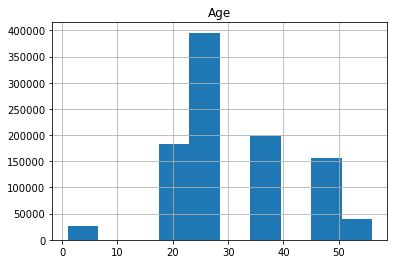

In [43]:
data.hist(column='Age')

In [44]:
bins_list = [1, 18, 25, 35, 45, 50, 56]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fae946cb3a0>]],
      dtype=object)

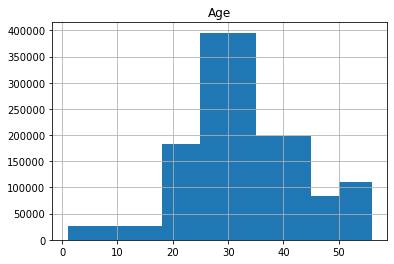

In [45]:
data.hist(column='Age', bins=bins_list)


User rating on the movie Toy Story¶

Toy story is MovieID = 1, let's get a distribution of ratings on that single ID


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fae93c0dbb0>]],
      dtype=object)

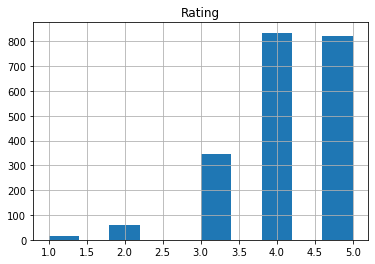

In [46]:
data[data['MovieID']==1].hist(column='Rating')

In [47]:
data[data['MovieID'] == 1].count()

MovieID       2077
Title         2077
UserID        2077
Genres        2077
Age           2077
Gender        2077
Occupation    2077
Zip-code      2077
Timestamp     2077
Rating        2077
dtype: int64

In [48]:
data[data['MovieID'] == 1].Rating.mean()

4.146846413095811

In [49]:
data.groupby('Title').size().sort_values(ascending=False)[:25]

Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Pr

In [50]:
user_2696 = data[data['UserID']==2696]

In [51]:
user_2696.shape

(20, 10)

In [52]:
user_2696.sort_values(by='Rating', ascending=False)

,MovieID,Title,UserID,Genres,Age,Gender,Occupation,Zip-code,Timestamp,Rating
440675,800,Lone Star (1996),2696,Drama|Mystery,25,M,7,24210,973308842,5
440667,1258,"Shining, The (1980)",2696,Horror,25,M,7,24210,973308710,4
440674,1892,"Perfect Murder, A (1998)",2696,Mystery|Thriller,25,M,7,24210,973308904,4
440685,1092,Basic Instinct (1992),2696,Mystery|Thriller,25,M,7,24210,973308886,4
440683,1783,Palmetto (1998),2696,Film-Noir|Mystery|Thriller,25,M,7,24210,973308865,4
440679,2389,Psycho (1998),2696,Crime|Horror|Thriller,25,M,7,24210,973308710,4
440678,3176,"Talented Mr. Ripley, The (1999)",2696,Drama|Mystery|Thriller,25,M,7,24210,973308865,4
440677,1711,Midnight in the Garden of Good and Evil (1997),2696,Comedy|Crime|Drama|Mystery,25,M,7,24210,973308904,4
440673,1805,Wild Things (1998),2696,Crime|Drama|Mystery|Thriller,25,M,7,24210,973308886,4
440672,1645,"Devil's Advocate, The (1997)",2696,Crime|Horror|Mystery|Thriller,25,M,7,24210,973308904,4


In [53]:
data['Genre_list'] = data['Genres'].apply(lambda x: x.split('|'))

<ipython-input-53-681582143902>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Genre_list'] = data['Genres'].apply(lambda x: x.split('|'))


In [55]:
data['Gender'].replace(['F','M'],[0,1],inplace=True)

/Users/ravikumartummalapenta/anaconda3/envs/myenv/lib/python3.8/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [62]:
from sklearn.preprocessing import MultiLabelBinarizer

## assign a new series to the genres_list column that contains a list of categories for each movie
list2series = pd.Series(data.Genre_list)

mlb = MultiLabelBinarizer()

## use mlb to create a new dataframe of the genres from the list for each row from the original data

one_hot_genres = pd.DataFrame(mlb.fit_transform(list2series),columns=mlb.classes_,index=list2series.index)

In [63]:
print(one_hot_genres.head())

   Action  Adventure  Animation  Children's  Comedy  Crime  Documentary  \
0       0          0          0           0       0      0            0   
1       0          0          1           1       0      0            0   
2       0          0          0           0       0      0            0   
3       0          0          0           0       0      0            0   
4       0          0          1           1       1      0            0   

   Drama  Fantasy  Film-Noir  Horror  Musical  Mystery  Romance  Sci-Fi  \
0      1        0          0       0        0        0        0       0   
1      0        0          0       0        1        0        0       0   
2      0        0          0       0        1        0        1       0   
3      1        0          0       0        0        0        0       0   
4      0        0          0       0        0        0        0       0   

   Thriller  War  Western  
0         0    0        0  
1         0    0        0  
2         0   

In [66]:
features = data[['MovieID', 'Rating', 'Age', 'Gender', 'Occupation', 'Zip-code']]

In [68]:
features.corr()['Rating']

MovieID      -0.064042
Rating        1.000000
Age           0.056869
Gender       -0.019861
Occupation    0.006753
Name: Rating, dtype: float64

In [69]:
master_features = pd.merge(features, one_hot_genres, left_index=True, right_index=True)

In [71]:
master_features.head()

,MovieID,Rating,Age,Gender,Occupation,Zip-code,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1193,5,1,0,10,48067,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,661,3,1,0,10,48067,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0
2,914,3,1,0,10,48067,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,3408,4,1,0,10,48067,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2355,5,1,0,10,48067,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [73]:
master_features.drop('Zip-code',axis=1,inplace=True)

In [74]:
master_features.head()

,MovieID,Rating,Age,Gender,Occupation,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1193,5,1,0,10,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,661,3,1,0,10,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
2,914,3,1,0,10,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,3408,4,1,0,10,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2355,5,1,0,10,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [75]:
master_features.corr()

,MovieID,Rating,Age,Gender,Occupation,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
MovieID,1.000000,-0.064042,0.027575,0.021626,0.008585,-0.042046,-0.082413,-0.014177,-0.071589,0.061667,...,-0.018792,-0.019655,0.057613,-0.059381,-0.028561,-0.118375,-0.011747,-0.058418,-0.081951,0.003940
Rating,-0.064042,1.000000,0.056869,-0.019861,0.006753,-0.047633,-0.036718,0.019670,-0.039829,-0.039622,...,-0.023312,0.060259,-0.094353,0.015643,0.015848,0.009644,-0.044487,-0.004806,0.075688,0.007311
Age,0.027575,0.056869,1.000000,-0.003189,0.078371,-0.030975,-0.016730,-0.047020,-0.052858,-0.044046,...,-0.024222,0.033495,-0.023901,0.005158,0.024308,0.017503,-0.010879,-0.014100,0.038446,0.038177
Gender,0.021626,-0.019861,-0.003189,1.000000,0.114974,0.094380,0.038645,-0.017719,-0.031662,-0.040758,...,0.002806,0.005152,0.036566,-0.038051,-0.000905,-0.091272,0.072372,0.038039,0.025636,0.026397
Occupation,0.008585,0.006753,0.078371,0.114974,1.000000,0.018347,0.014309,-0.003834,-0.006906,-0.006149,...,0.001299,0.005246,0.001439,-0.007312,0.002421,-0.014018,0.026250,0.008981,0.010264,0.005924
Action,-0.042046,-0.047633,-0.030975,0.094380,0.018347,1.000000,0.374961,-0.110294,-0.141314,-0.268092,...,0.014551,-0.080288,-0.042733,-0.100432,-0.054084,-0.067830,0.319117,0.202756,0.135872,0.022242
Adventure,-0.082413,-0.036718,-0.016730,0.038645,0.014309,0.374961,1.000000,0.004732,0.098283,-0.124960,...,0.227046,-0.014178,-0.057256,-0.022327,-0.043503,-0.024389,0.284190,-0.038423,0.016647,-0.011964
Animation,-0.014177,0.019670,-0.047020,-0.017719,-0.003834,-0.110294,0.004732,1.000000,0.576204,0.018544,...,0.012025,0.037013,-0.049730,0.335231,-0.042488,-0.054540,-0.055526,-0.085713,-0.046114,-0.030908
Children's,-0.071589,-0.039829,-0.052858,-0.031662,-0.006906,-0.141314,0.098283,0.576204,1.000000,0.058711,...,0.263280,-0.038033,-0.077099,0.312567,-0.052786,-0.084550,-0.038844,-0.132642,-0.066539,-0.031269
Comedy,0.061667,-0.039622,-0.044046,-0.040758,-0.006149,-0.268092,-0.124960,0.018544,0.058711,1.000000,...,-0.006010,-0.101425,-0.093064,0.030566,-0.105346,0.112843,-0.187079,-0.299501,-0.127101,0.007927


In [76]:
X_data = master_features.drop(['MovieID','Rating'], axis=1)

Y_target = master_features['Rating']

In [77]:
X_data.shape

(1000209, 21)

In [78]:
Y_target.shape

(1000209,)

In [79]:
X_data.head()

,Age,Gender,Occupation,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,0,10,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,10,0,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,0,10,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,1,0,10,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,10,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
Y_target.head()

0    5
1    3
2    3
3    4
4    5
Name: Rating, dtype: int64

In [82]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_data,Y_target,random_state=1,test_size=0.25)

In [83]:
from sklearn.linear_model import LogisticRegression

In [84]:
logreg = LogisticRegression(max_iter=100000)

In [85]:
logreg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [86]:
y_pred = logreg.predict(x_test)

In [87]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred)

0.348474123485821

In [88]:
# print the first 30 true and predicted responses
print ('actual:    ', y_test.values[0:30])
print ('predicted: ', y_pred[0:30])

actual:     [4 4 2 3 3 5 1 4 4 4 3 4 3 5 4 4 5 4 4 5 2 3 4 5 4 2 3 5 4 4]
predicted:  [4 4 4 4 4 4 4 4 4 4 4 4 4 3 4 4 4 5 4 4 4 4 4 4 4 4 4 5 4 4]
